In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# CNN Model

In [2]:
cnn=pd.read_csv("cnn_results_confidence.csv")

In [3]:
cnn.columns

Index(['image_path', 'class', 'predict', 'Mild_Demented', 'Moderate_Demented',
       'Non_Demented', 'Very_Mild_Demented'],
      dtype='object')

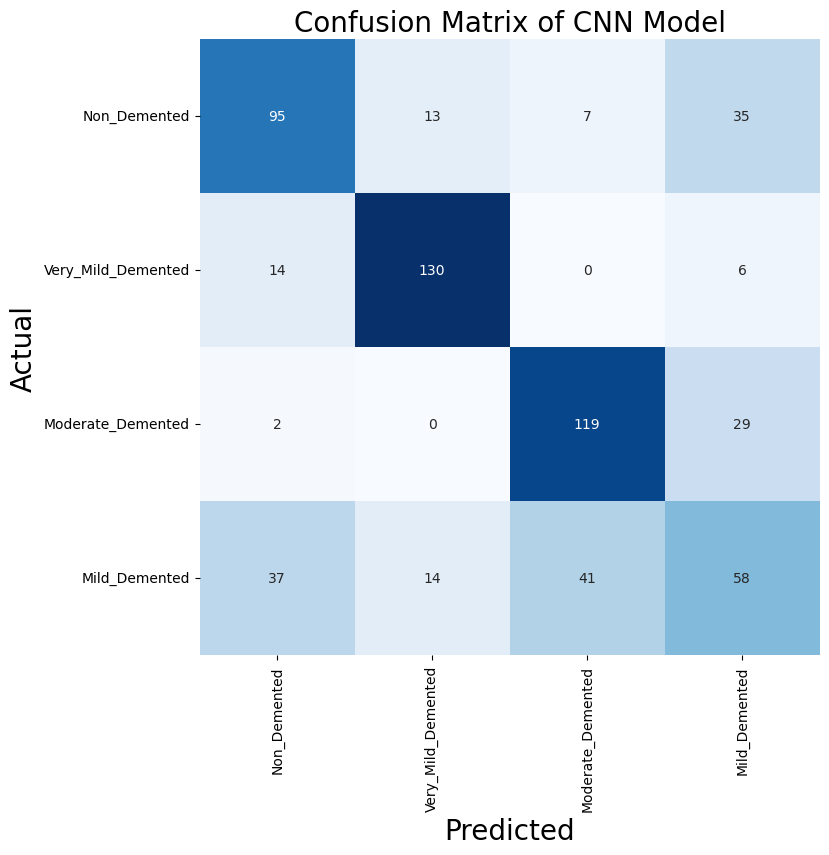

CNN Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.64      0.63      0.64       150
 Moderate_Demented       0.83      0.87      0.85       150
      Non_Demented       0.71      0.79      0.75       150
Very_Mild_Demented       0.45      0.39      0.42       150

          accuracy                           0.67       600
         macro avg       0.66      0.67      0.66       600
      weighted avg       0.66      0.67      0.66       600



In [4]:
conf_matrix = confusion_matrix(cnn['class'], cnn['predict'])
class_report = classification_report(cnn['class'], cnn['predict'])
class_names = list(cnn['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of CNN Model", fontsize=20)
plt.savefig("confusion_matrix_images/cnn_confusion_matrix.png", transparent=True)
plt.show()

print("CNN Classification Report:\n----------------------\n", class_report)

# Support Vector Machine Model

In [5]:
svm = pd.read_csv('svm_confidence.csv')
svm

,image_path,class,predicted_class,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,Non_Demented,-0.225440,0.851067,3.209695,2.181894
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,Very_Mild_Demented,1.085240,-0.232822,2.134339,3.188261
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,Mild_Demented,3.235156,0.872013,-0.231725,2.112378
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,Mild_Demented,3.243447,2.046705,-0.247102,0.998096
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,Mild_Demented,3.197102,0.850935,-0.206141,2.165223
...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,Mild_Demented,3.240649,0.807596,-0.201587,2.076714
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,Mild_Demented,3.149364,-0.183113,0.909114,2.146270
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,Mild_Demented,3.234781,0.977449,-0.244381,2.101461
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,Mild_Demented,3.242045,0.965533,-0.246006,2.073111


c:\Users\Ahmad\anaconda3-\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmad\anaconda3-\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmad\anaconda3-\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


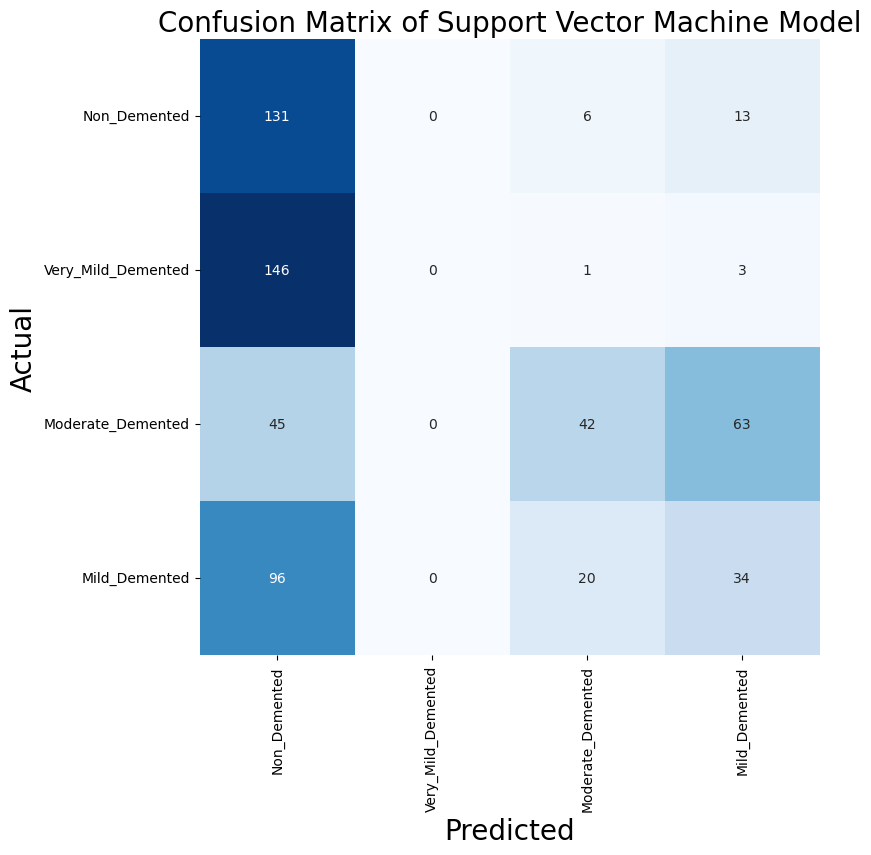

Support Vector Machine Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.31      0.87      0.46       150
 Moderate_Demented       0.00      0.00      0.00       150
      Non_Demented       0.61      0.28      0.38       150
Very_Mild_Demented       0.30      0.23      0.26       150

          accuracy                           0.34       600
         macro avg       0.31      0.34      0.28       600
      weighted avg       0.31      0.34      0.28       600



In [6]:
conf_matrix = confusion_matrix(svm['class'], svm['predicted_class'])
class_report = classification_report(svm['class'], svm['predicted_class'])
class_names = list(svm['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Support Vector Machine Model", fontsize=20)
plt.savefig("confusion_matrix_images/svm_confusion_matrix.png", transparent=True)
plt.show()

print("Support Vector Machine Classification Report:\n----------------------\n", class_report)

# Naive Bayes Model

In [7]:
nb=pd.read_csv("nb_confidence.csv")
nb

,image_path,class,predicted_class,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,Non_Demented,0.0,0.0,1.0,0.0
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,Non_Demented,0.0,0.0,1.0,0.0
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,Moderate_Demented,0.0,1.0,0.0,0.0
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,Moderate_Demented,0.0,1.0,0.0,0.0
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,Very_Mild_Demented,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,Very_Mild_Demented,0.0,0.0,0.0,1.0
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,Non_Demented,0.0,0.0,1.0,0.0
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,Moderate_Demented,0.0,1.0,0.0,0.0
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,Moderate_Demented,0.0,1.0,0.0,0.0


# Gradient boosting Model

In [8]:
gb = pd.read_csv("gb_confidence.csv")
gb.columns

Index(['image_path', 'class', 'predicted_class', 'Mild_Demented',
       'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'],
      dtype='object')

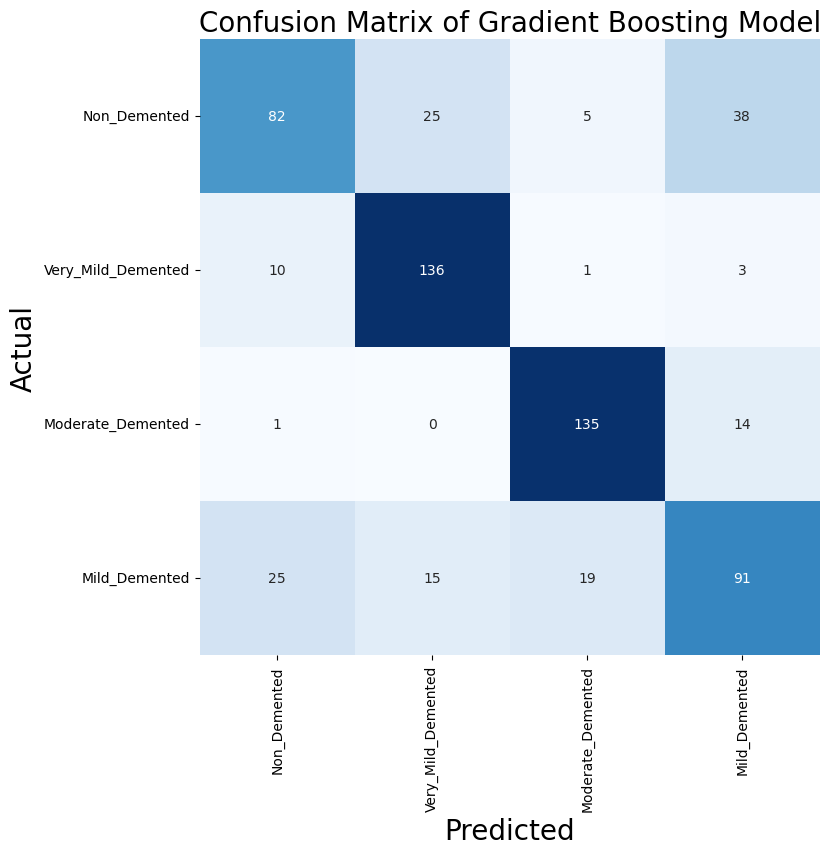

Gradient Boosting Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.69      0.55      0.61       150
 Moderate_Demented       0.77      0.91      0.83       150
      Non_Demented       0.84      0.90      0.87       150
Very_Mild_Demented       0.62      0.61      0.61       150

          accuracy                           0.74       600
         macro avg       0.73      0.74      0.73       600
      weighted avg       0.73      0.74      0.73       600



In [9]:
conf_matrix = confusion_matrix(gb['class'], gb['predicted_class'])
class_report = classification_report(gb['class'], gb['predicted_class'])
class_names = list(gb['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Gradient Boosting Model", fontsize=20)
plt.savefig("confusion_matrix_images/gb_confusion_matrix.png", transparent=True)
plt.show()

print("Gradient Boosting Classification Report:\n----------------------\n", class_report)

# Google Base (ViT)

In [10]:
google_base=pd.read_csv("base_google_confidence.csv")
google_base

,image_path,class,Non_Demented,Very_Mild_Demented,Mild_Demented,Moderate_Demented,Max_Confidence,Max_Confidence_Class
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,0.991131,0.005820,0.001753,0.001295,0.991131,Non_Demented
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,0.992996,0.002835,0.002189,0.001980,0.992996,Non_Demented
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,0.001799,0.990365,0.006440,0.001396,0.990365,Very_Mild_Demented
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,0.002401,0.990862,0.003777,0.002960,0.990862,Very_Mild_Demented
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,0.001196,0.000534,0.000633,0.997637,0.997637,Moderate_Demented
...,...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,0.002936,0.003046,0.992140,0.001878,0.992140,Mild_Demented
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,0.003460,0.002755,0.990509,0.003275,0.990509,Mild_Demented
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,0.001990,0.002216,0.993799,0.001994,0.993799,Mild_Demented
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,0.000782,0.000465,0.000797,0.997956,0.997956,Moderate_Demented


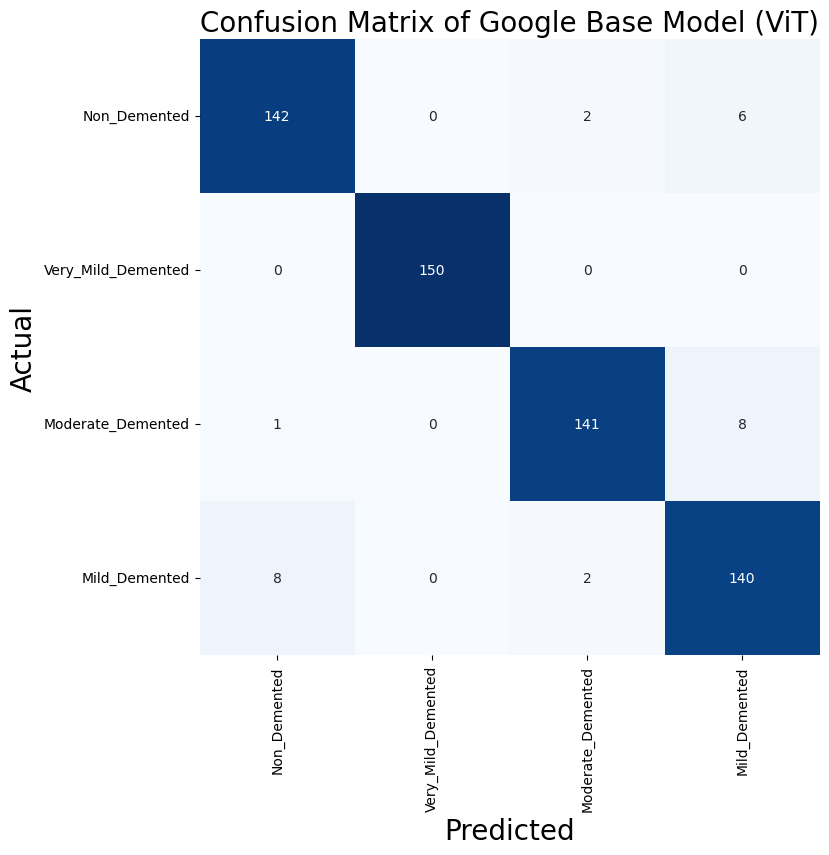

Google Base (ViT) Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.94      0.95      0.94       150
 Moderate_Demented       1.00      1.00      1.00       150
      Non_Demented       0.97      0.94      0.96       150
Very_Mild_Demented       0.91      0.93      0.92       150

          accuracy                           0.95       600
         macro avg       0.96      0.96      0.96       600
      weighted avg       0.96      0.95      0.96       600



In [11]:
conf_matrix = confusion_matrix(google_base['class'], google_base['Max_Confidence_Class'])
class_report = classification_report(google_base['class'], google_base['Max_Confidence_Class'])
class_names = list(google_base['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Google Base Model (ViT)", fontsize=20)
plt.savefig("confusion_matrix_images/google_base_confusion_matrix.png", transparent=True)
plt.show()

print("Google Base (ViT) Classification Report:\n----------------------\n", class_report)

# Google Large Model (ViT)

In [12]:
google_large=pd.read_csv("large_google_confidence.csv")
google_large

,image_path,class,Non_Demented,Very_Mild_Demented,Mild_Demented,Moderate_Demented,Max_Confidence,Max_Confidence_Class
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,0.999221,0.000445,0.000185,0.000148,0.999221,Non_Demented
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,0.999348,0.000243,0.000201,0.000209,0.999348,Non_Demented
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,0.000278,0.999218,0.000374,0.000130,0.999218,Very_Mild_Demented
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,0.000277,0.999121,0.000403,0.000200,0.999121,Very_Mild_Demented
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,0.000072,0.000072,0.000058,0.999798,0.999798,Moderate_Demented
...,...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,0.000219,0.000311,0.999308,0.000162,0.999308,Mild_Demented
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,0.000436,0.000250,0.999070,0.000245,0.999070,Mild_Demented
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,0.000283,0.000384,0.999138,0.000195,0.999138,Mild_Demented
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,0.000063,0.000059,0.000084,0.999794,0.999794,Moderate_Demented


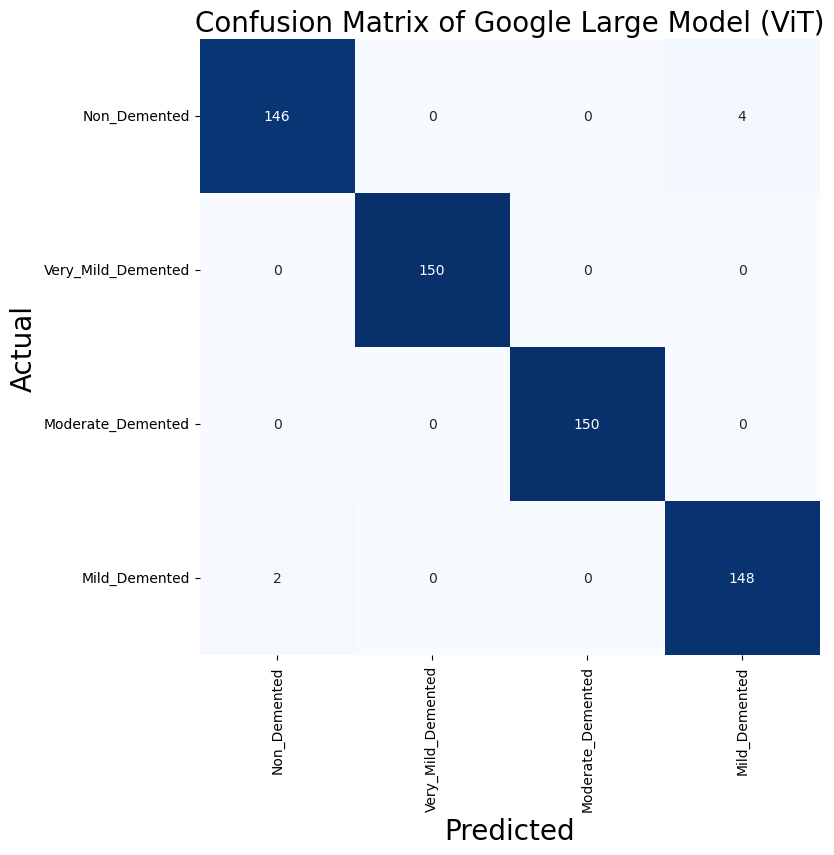

Google Large Model (ViT) Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.99      0.97      0.98       150
 Moderate_Demented       1.00      1.00      1.00       150
      Non_Demented       1.00      1.00      1.00       150
Very_Mild_Demented       0.97      0.99      0.98       150

          accuracy                           0.99       600
         macro avg       0.99      0.99      0.99       600
      weighted avg       0.99      0.99      0.99       600



In [13]:
conf_matrix = confusion_matrix(google_large['class'], google_large['Max_Confidence_Class'])
class_report = classification_report(google_large['class'], google_large['Max_Confidence_Class'])
class_names = list(google_large['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Google Large Model (ViT)", fontsize=20)
plt.savefig("confusion_matrix_images/google_large_confusion_matrix.png", transparent=True)
plt.show()

print("Google Large Model (ViT) Classification Report:\n----------------------\n", class_report)

# Transfer Learning Model

In [14]:
tf=pd.read_csv("tf_results_confidence.csv")
tf

,image_path,class,predict,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,Non_Demented,2.060850e-03,2.700467e-13,6.108054e-01,3.871337e-01
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,Non_Demented,1.803910e-09,6.828954e-17,9.999918e-01,8.265492e-06
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,Mild_Demented,5.053591e-01,6.407197e-04,3.799102e-06,4.939963e-01
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,Mild_Demented,6.744630e-01,2.117605e-04,1.022251e-05,3.253149e-01
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,Very_Mild_Demented,1.733400e-01,1.166641e-02,1.194299e-01,6.955637e-01
...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,Non_Demented,2.890883e-02,8.019552e-07,9.467610e-01,2.432940e-02
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,Mild_Demented,8.534163e-01,2.508218e-13,1.393231e-01,7.260644e-03
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,Moderate_Demented,7.805163e-02,9.218485e-01,6.802451e-11,9.989702e-05
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,Moderate_Demented,3.417591e-03,9.965825e-01,4.324908e-17,4.541470e-11


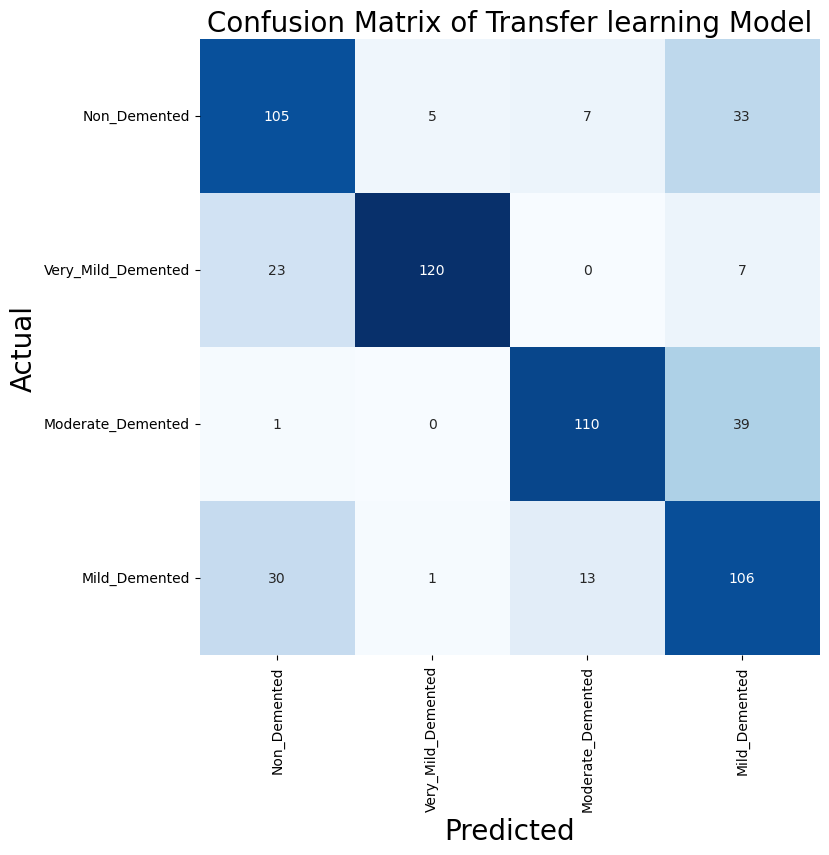

Transfer learning Model Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.66      0.70      0.68       150
 Moderate_Demented       0.95      0.80      0.87       150
      Non_Demented       0.85      0.73      0.79       150
Very_Mild_Demented       0.57      0.71      0.63       150

          accuracy                           0.73       600
         macro avg       0.76      0.73      0.74       600
      weighted avg       0.76      0.73      0.74       600



In [15]:
conf_matrix = confusion_matrix(tf['class'], tf['predict'])
class_report = classification_report(tf['class'], tf['predict'])
class_names = list(tf['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Transfer learning Model", fontsize=20)
plt.savefig("confusion_matrix_images/tf_confusion_matrix.png", transparent=True)
plt.show()

print("Transfer learning Model Classification Report:\n----------------------\n", class_report)

# Microsoft base Model (ViT)

In [16]:
microsoft=pd.read_csv("microsoft_base_confidence.csv")
microsoft

,image_path,class,Non_Demented,Very_Mild_Demented,Mild_Demented,Moderate_Demented,Max_Confidence,Max_Confidence_Class
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,0.997887,0.001253,0.000521,0.000340,0.997887,Non_Demented
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,0.998557,0.000466,0.000423,0.000555,0.998557,Non_Demented
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,0.000355,0.997403,0.002001,0.000242,0.997403,Very_Mild_Demented
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,0.000781,0.998130,0.000484,0.000605,0.998130,Very_Mild_Demented
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,0.000179,0.000185,0.000134,0.999501,0.999501,Moderate_Demented
...,...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,0.000604,0.000547,0.998209,0.000639,0.998209,Mild_Demented
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,0.000767,0.000455,0.998100,0.000678,0.998100,Mild_Demented
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,0.000467,0.000670,0.998422,0.000442,0.998422,Mild_Demented
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,0.000183,0.000114,0.000221,0.999482,0.999482,Moderate_Demented


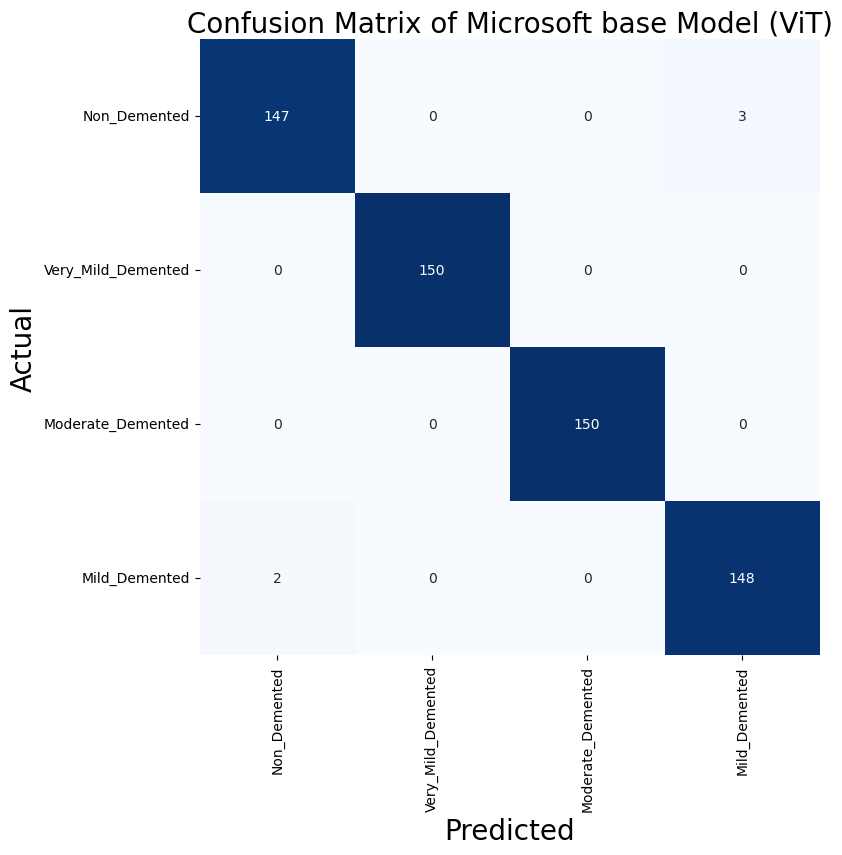

Microsoft base Model (ViT) Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.99      0.98      0.98       150
 Moderate_Demented       1.00      1.00      1.00       150
      Non_Demented       1.00      1.00      1.00       150
Very_Mild_Demented       0.98      0.99      0.98       150

          accuracy                           0.99       600
         macro avg       0.99      0.99      0.99       600
      weighted avg       0.99      0.99      0.99       600



In [17]:
conf_matrix = confusion_matrix(microsoft['class'], microsoft['Max_Confidence_Class'])
class_report = classification_report(microsoft['class'], microsoft['Max_Confidence_Class'])
class_names = list(microsoft['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Microsoft base Model (ViT)", fontsize=20)
plt.savefig("confusion_matrix_images/microsoft_confusion_matrix.png", transparent=True)
plt.show()

print("Microsoft base Model (ViT) Classification Report:\n----------------------\n", class_report)

# Pretrained Model (Benchmark)

In [18]:
pretrained=pd.read_csv("pretrained_confidence.csv")
pretrained

,image_path,class,image_path.1,class.1,Non_Demented,Very_Mild_Demented,Mild_Demented,Moderate_Demented,Max_Confidence,Max_Confidence_Class
0,Benchmark\Non_Demented\non_871.jpg,Non_Demented,Benchmark\Non_Demented\non_871.jpg,Non_Demented,0.997887,0.001253,0.000521,0.000340,0.997887,Non_Demented
1,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,Benchmark\Non_Demented\non_3104.jpg,Non_Demented,0.998557,0.000466,0.000423,0.000555,0.998557,Non_Demented
2,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,Benchmark\Very_Mild_Demented\augmented_80_very...,Very_Mild_Demented,0.000355,0.997403,0.002001,0.000242,0.997403,Very_Mild_Demented
3,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,Benchmark\Very_Mild_Demented\augmented_123_ver...,Very_Mild_Demented,0.000781,0.998130,0.000484,0.000605,0.998130,Very_Mild_Demented
4,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,Benchmark\Moderate_Demented\augmented_182_mode...,Moderate_Demented,0.000179,0.000185,0.000134,0.999501,0.999501,Moderate_Demented
...,...,...,...,...,...,...,...,...,...,...
595,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,Benchmark\Mild_Demented\mild_46.jpg,Mild_Demented,0.000604,0.000547,0.998209,0.000639,0.998209,Mild_Demented
596,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,Benchmark\Mild_Demented\mild_748.jpg,Mild_Demented,0.000767,0.000455,0.998100,0.000678,0.998100,Mild_Demented
597,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,Benchmark\Mild_Demented\augmented_32_mild_319.jpg,Mild_Demented,0.000467,0.000670,0.998422,0.000442,0.998422,Mild_Demented
598,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,Benchmark\Moderate_Demented\augmented_240_mode...,Moderate_Demented,0.000183,0.000114,0.000221,0.999482,0.999482,Moderate_Demented


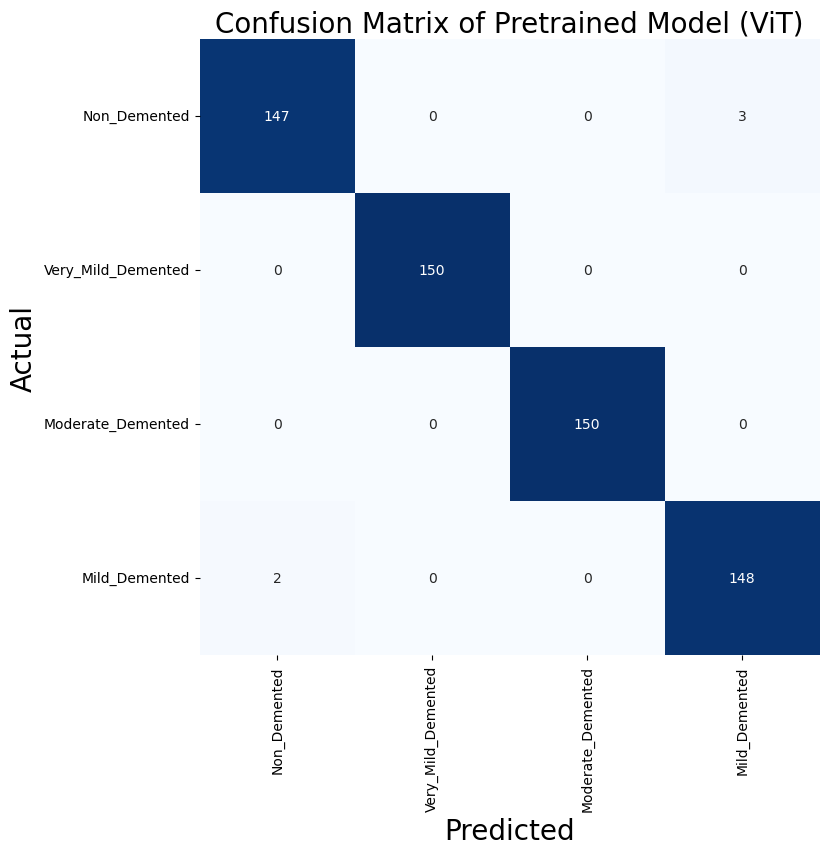

Pretrained Model (ViT) Classification Report:
----------------------
                     precision    recall  f1-score   support

     Mild_Demented       0.99      0.98      0.98       150
 Moderate_Demented       1.00      1.00      1.00       150
      Non_Demented       1.00      1.00      1.00       150
Very_Mild_Demented       0.98      0.99      0.98       150

          accuracy                           0.99       600
         macro avg       0.99      0.99      0.99       600
      weighted avg       0.99      0.99      0.99       600



In [19]:
conf_matrix = confusion_matrix(pretrained['class'], pretrained['Max_Confidence_Class'])
class_report = classification_report(pretrained['class'], pretrained['Max_Confidence_Class'])
class_names = list(pretrained['class'].unique())

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names, rotation=0)

plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title(f"Confusion Matrix of Pretrained Model (ViT)", fontsize=20)
plt.savefig("confusion_matrix_images/pretrained_confusion_matrix.png", transparent=True)
plt.show()

print("Pretrained Model (ViT) Classification Report:\n----------------------\n", class_report)


________________________________________

# Roc Curves


In [20]:
dataframes = [("Base google", google_base), ("Large google with PEFT", google_large), ("Base Microsoft", microsoft), ("CNN", cnn), ("Naive Bayes", nb), ("Transfer Learning", tf), ("Gradient Boosting", gb), ("SVM", svm), ("Pretrained Model", pretrained)]

In [21]:
classes = dataframes[0][1]['class'].unique()
n_classes = len(classes)

In [22]:
all_fpr = np.linspace(0, 1, 3000)

In [23]:
mean_tprs = []

for name, df in dataframes:
    y_true = label_binarize(df['class'], classes=classes)
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], df[f'{classes[i]}'])
        mean_tpr += np.interp(all_fpr, fpr, tpr)
    
    mean_tpr /= n_classes
    mean_tprs.append(mean_tpr)

roc_aucs = [auc(all_fpr, mean_tpr) for mean_tpr in mean_tprs]

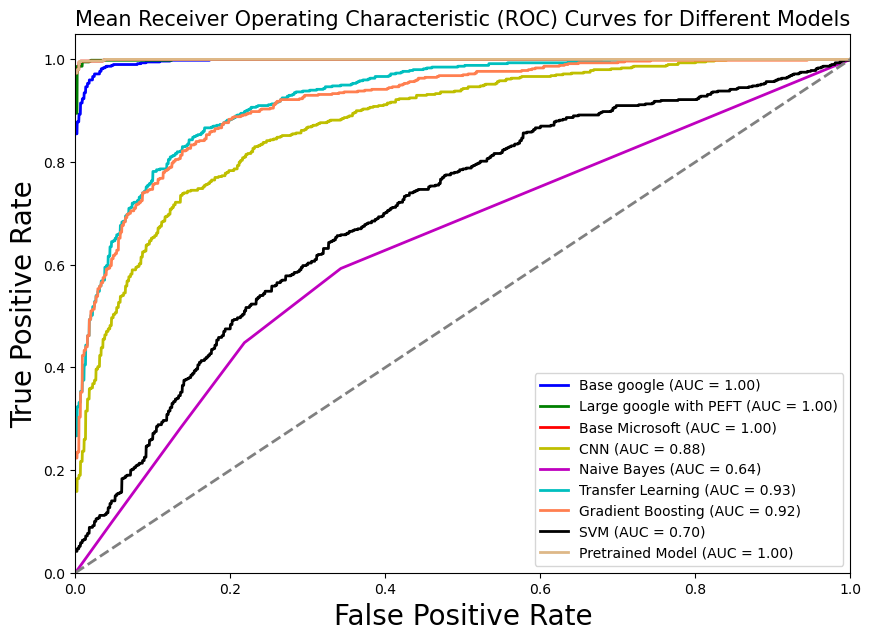

In [24]:
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'y', 'm', "c", "coral", "black", 'burlywood']
for i, (name, mean_tpr) in enumerate(zip(dataframes, mean_tprs)):
    plt.plot(all_fpr, mean_tpr, color=colors[i], lw=2, label=f'{name[0]} (AUC = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Mean Receiver Operating Characteristic (ROC) Curves for Different Models', fontsize = 15)
plt.legend(loc="lower right")
plt.savefig("confusion_matrix_images/roc_curves.png", transparent=True)
plt.show()
